<a href="https://colab.research.google.com/github/EmilianoLS/Data-Science/blob/main/starbucks_segment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import json
import zipfile
import calendar

In [3]:
#!pip install -q kaggle
#!pip install -q kaggle-cli
#!mkdir -p ~/.kaggle
#!cp "/content/drive/MyDrive/.kaggle/kaggle.json" ~/.kaggle/
#!cat ~/.kaggle/kaggle.json 
#!chmod 600 ~/.kaggle/kaggle.json
# For competition datasets
#!kaggle competitions download -c instacart-market-basket-analysis -p '/content/drive/MyDrive/Colab Notebooks/datasets'

In [4]:
df_list = []
file_list = ['aisles.csv.zip', 'departments.csv.zip', 
             'order_products__train.csv.zip','order_products__prior.csv.zip',
             'orders.csv.zip','products.csv.zip']

for file_name in file_list:
  zf = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/datasets/' + file_name) 
  df_list.append(pd.read_csv(zf.open(file_name[:-4])))


aisles = df_list[0]
departments = df_list[1]
order_products_train = df_list[2]
order_products_prior = df_list[3]
orders = df_list[4]
products = df_list[5]

## EDA

### Orders

In [5]:
orders_subset = orders.loc[orders['eval_set'].isin(['prior','train'])].reset_index(drop = True)
orders_subset['order_dow_name'] = orders_subset['order_dow'].apply(lambda x: calendar.day_abbr[x])

In [6]:
orders_subset.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_dow_name
0,2539329,1,prior,1,2,8,NaN,Wed
1,2398795,1,prior,2,3,7,15.0,Thu
2,473747,1,prior,3,3,12,21.0,Thu
3,2254736,1,prior,4,4,7,29.0,Fri
4,431534,1,prior,5,4,15,28.0,Fri


In [7]:
orders_subset.shape

(3346083, 8)

In [8]:
orders_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346083 entries, 0 to 3346082
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   order_dow_name          object 
dtypes: float64(1), int64(5), object(2)
memory usage: 204.2+ MB


In [9]:
orders_subset.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.346083e+06,3.346083e+06,3.346083e+06,3.346083e+06,3.346083e+06,3.139874e+06
mean,1.710561e+06,1.029778e+05,1.716804e+01,2.776053e+00,1.344887e+01,1.097229e+01
std,9.875758e+05,5.953534e+04,1.775659e+01,2.044998e+00,4.226137e+00,9.121475e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552595e+05,5.139100e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710552e+06,1.026750e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565877e+06,1.543870e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [10]:
# Numero de usuarios unicos
print(f'Hay {orders_subset.user_id.nunique()} usuarios únicos y {orders_subset.shape[0]} ordenes')

Hay 206209 usuarios únicos y 3346083 ordenes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


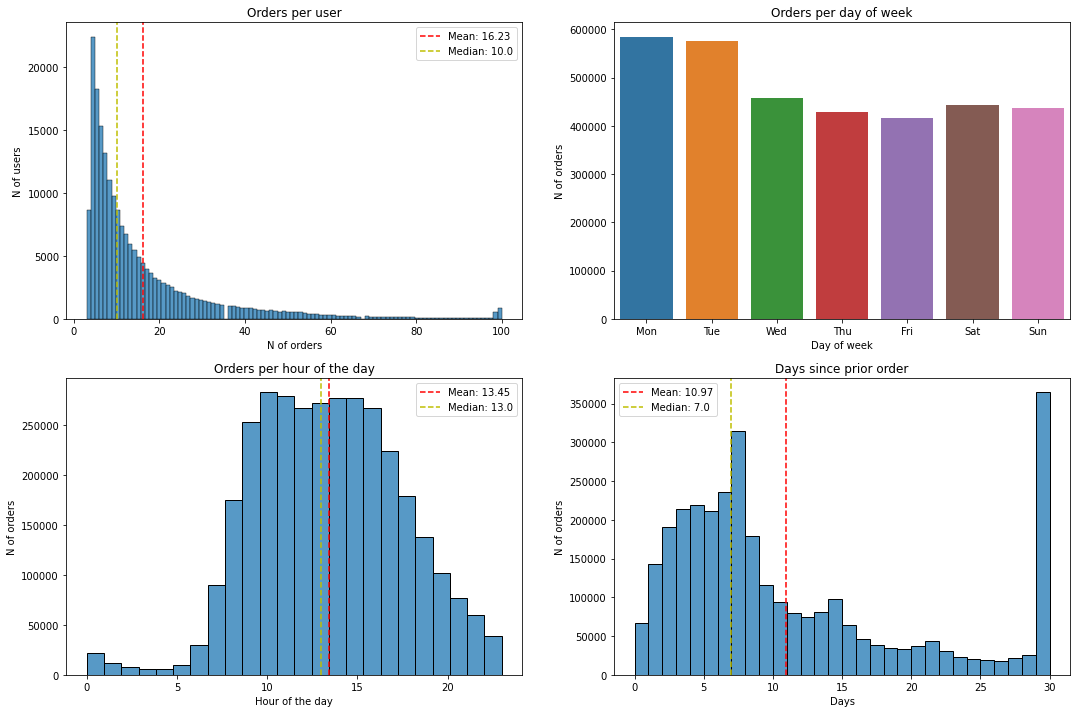

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 12))

# Ordenes por usuario
sns.histplot(orders_subset.user_id.value_counts(), bins = 100, ax = ax[0,0])
media = np.mean(orders_subset.user_id.value_counts())
mediana = np.median(orders_subset.user_id.value_counts())
ax[0,0].axvline(media, linestyle = '--', color = 'r', label = 'Mean: ' + str(round(media, 2)))
ax[0,0].axvline(mediana, linestyle = '--', color = 'y', label = 'Median: ' + str(round(mediana, 2)))
ax[0,0].set_xlabel('N of orders')
ax[0,0].set_ylabel('N of users')
ax[0,0].set_title('Orders per user')
ax[0,0].legend()

# Ordenes por dia de la semana
sns.countplot(orders_subset.order_dow_name, order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ax = ax[0,1])
ax[0,1].set_xlabel('Day of week')
ax[0,1].set_ylabel('N of orders')
ax[0,1].set_title('Orders per day of week')

# Ordenes por hora del dia
sns.histplot(orders_subset.order_hour_of_day, bins = 24, ax = ax[1,0])
media = np.mean(orders_subset.order_hour_of_day)
mediana = np.median(orders_subset.order_hour_of_day)
ax[1,0].set_xlabel('Hour of the day')
ax[1,0].set_ylabel('N of orders')
ax[1,0].set_title('Orders per hour of the day')
ax[1,0].axvline(media, linestyle = '--', color = 'r', label = 'Mean: ' + str(round(media, 2)))
ax[1,0].axvline(mediana, linestyle = '--', color = 'y', label = 'Median: ' + str(round(mediana, 2)))
ax[1,0].legend()


# Dias desde la ultima orden
sns.histplot(orders_subset.days_since_prior_order, bins = 30, ax = ax[1,1])
media = np.mean(orders_subset.days_since_prior_order)
mediana = orders_subset.days_since_prior_order.median()
ax[1,1].set_xlabel('Days')
ax[1,1].set_ylabel('N of orders')
ax[1,1].set_title('Days since prior order')
ax[1,1].axvline(media, linestyle = '--', color = 'r', label = 'Mean: ' + str(round(media, 2)))
ax[1,1].axvline(mediana, linestyle = '--', color = 'y', label = 'Median: ' + str(round(mediana, 2)))
ax[1,1].legend()

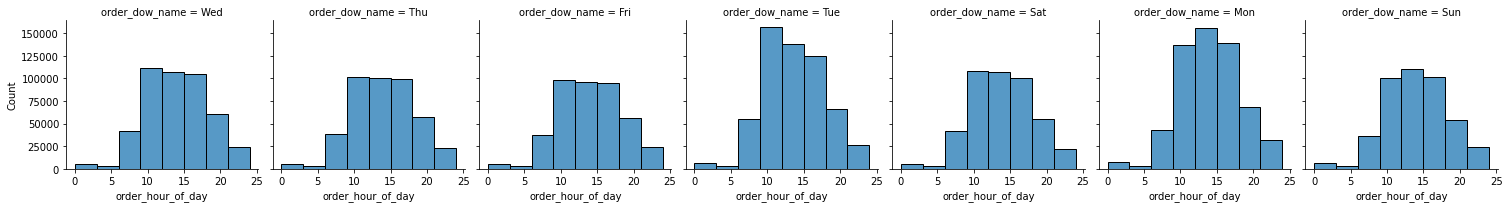

In [12]:
# Cantidad de ordenes por hora del dia, para cada dia de la semana
sns.displot(
    orders_subset, x = "order_hour_of_day", col = "order_dow_name",
    binwidth=3, height=3, facet_kws=dict(margin_titles=False),bins = 25
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


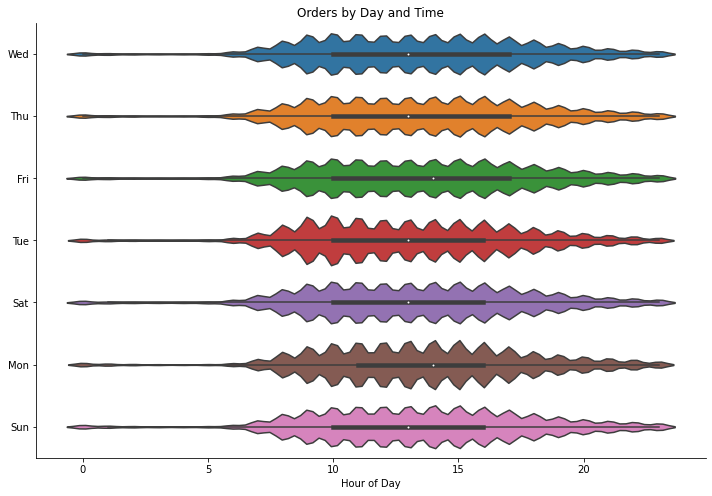

In [13]:
plt.figure(figsize=(12, 8))
sns.violinplot(orders_subset.order_hour_of_day, orders_subset.order_dow_name, orient='h')
plt.xlabel('Hour of Day')
plt.ylabel('')
plt.title('Orders by Day and Time')
sns.despine()

### Order Products

In [14]:
# Join both prior and train order_products

order_products = pd.concat([order_products_prior, order_products_train]).reset_index(drop = True)

Text(0.5, 1.0, 'Percentage of reorder')

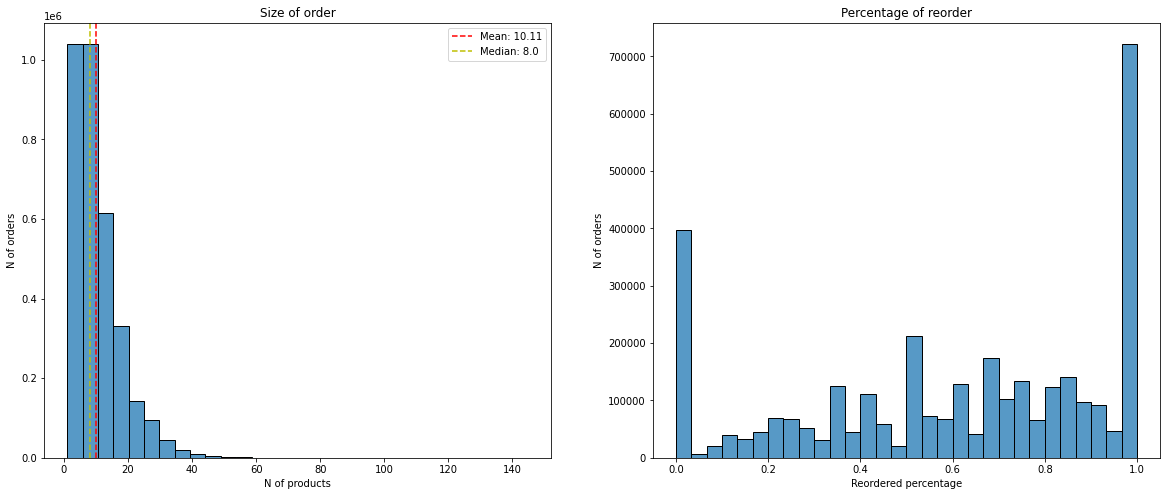

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

# Numero de productos por orden
media = np.mean(order_products.order_id.value_counts())
mediana = np.median(order_products.order_id.value_counts())
sns.histplot(order_products.order_id.value_counts(), bins = 30, ax = ax[0])
ax[0].axvline(media, linestyle = '--', color = 'r', label = 'Mean: ' + str(round(media, 2)))
ax[0].axvline(mediana, linestyle = '--', color = 'y', label = 'Median: ' + str(round(mediana, 2)))
ax[0].set_xlabel('N of products')
ax[0].set_ylabel('N of orders')
ax[0].set_title('Size of order')
ax[0].legend()

# Tasa de productos reordenados por orden

sns.histplot(order_products.groupby('order_id')['reordered'].mean(), bins = 30, ax = ax[1])
ax[1].set_xlabel('Reordered percentage')
ax[1].set_ylabel('N of orders')
ax[1].set_title('Percentage of reorder')

In [16]:
# Describe sobre el numero de productos por ordenes
order_products.groupby('order_id').agg({'product_id':'count'}).describe()

,product_id
count,3.346083e+06
mean,1.010707e+01
std,7.542326e+00
min,1.000000e+00
25%,5.000000e+00
50%,8.000000e+00
75%,1.400000e+01
max,1.450000e+02


In [26]:
# Describe sobre el porcentaje de re ordenacion
order_products.groupby('order_id').agg({'reordered':'mean'}).describe()

,reordered
count,3.346083e+06
mean,5.988126e-01
std,3.367931e-01
min,0.000000e+00
25%,3.333333e-01
50%,6.666667e-01
75%,9.032258e-01
max,1.000000e+00


In [28]:
# Detalle de la cantidad de productos en las ordenes con una tasa de re ordenación del 100%

order_products_grouped_reorder = order_products.groupby('order_id').agg({'reordered':'mean','product_id':'count'})
order_products_grouped_reorder[order_products_grouped_reorder['reordered'] == 1.0]['product_id'].describe()

count    719207.000000
mean          5.749913
std           5.044118
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         102.000000
Name: product_id, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


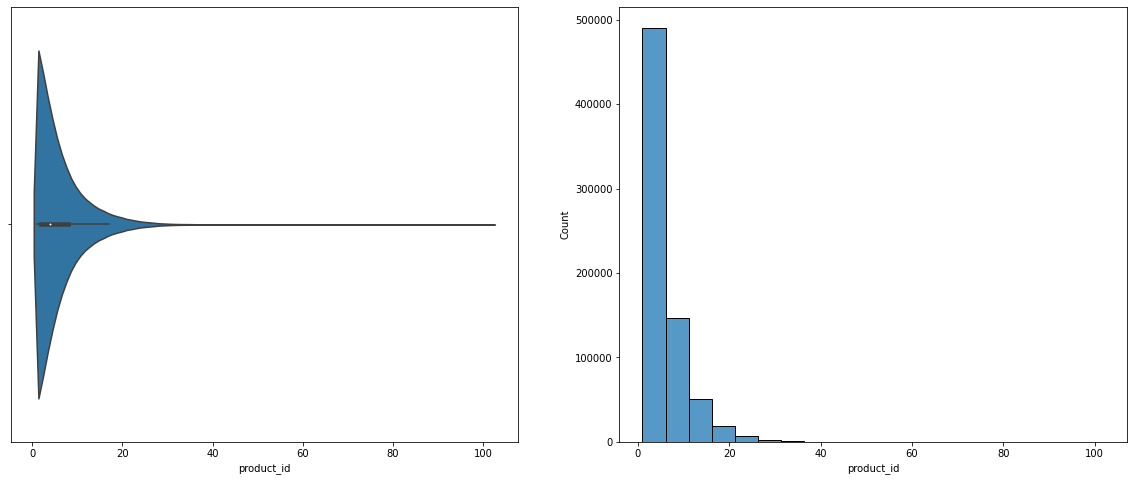

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
sns.violinplot(order_products_grouped_reorder[order_products_grouped_reorder['reordered'] == 1.0]['product_id'], ax = ax[0])
sns.histplot(order_products_grouped_reorder[order_products_grouped_reorder['reordered'] == 1.0]['product_id'], bins = 20, ax = ax[1])

In [17]:
# Obtengo el tamaño de las ordenes segun el dia de la semana

order_products_temp = pd.merge(order_products, orders_subset[['order_id','order_dow_name']], how = 'left', on = 'order_id')
order_products_temp = order_products_temp.groupby(['order_id','order_dow_name'], as_index = False).agg({'product_id':'count'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


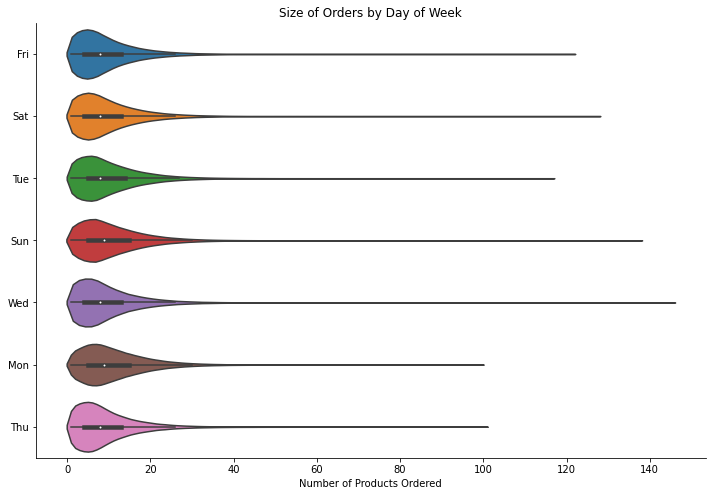

In [19]:
plt.figure(figsize=(12, 8))
sns.violinplot(order_products_temp.product_id, order_products_temp.order_dow_name, 
               orient='h')
plt.xlabel('Number of Products Ordered')
plt.ylabel('')
plt.title('Size of Orders by Day of Week')
sns.despine()

In [20]:
# Uno con la tabla de descripcion de productos
order_products = pd.merge(order_products, products[['product_id','product_name']], how = 'left', on = 'product_id')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


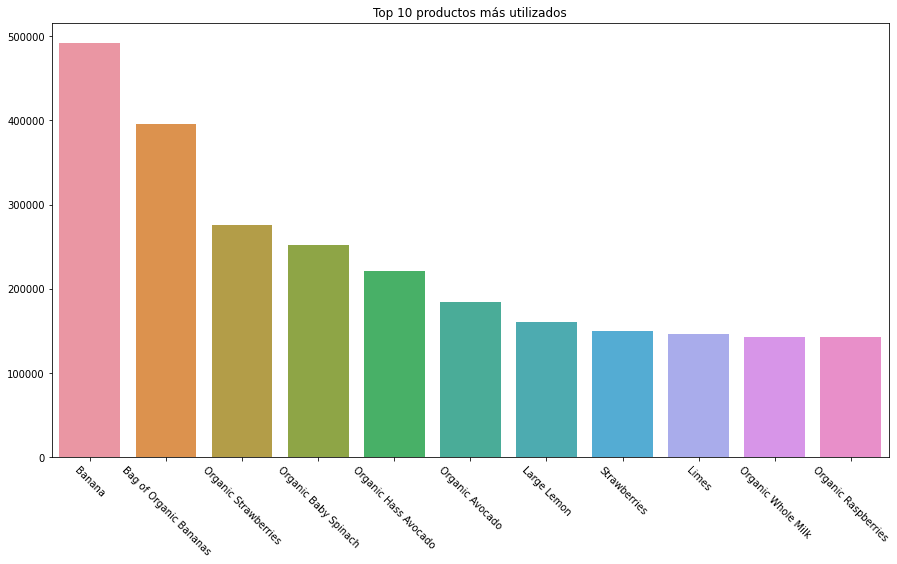

In [21]:
# 10 Productos más comunes
plt.figure(figsize = (15,8))
plt.xticks(rotation = -45)
plt.title('Top 10 productos más utilizados')
names = order_products.product_name.value_counts()[:11].index
orders = order_products.product_name.value_counts()[:11].values
sns.barplot(names, orders)

count    3.346083e+06
mean     5.988126e-01
std      3.367931e-01
min      0.000000e+00
25%      3.333333e-01
50%      6.666667e-01
75%      9.032258e-01
max      1.000000e+00
Name: reordered, dtype: float64

### Products

Text(0.5, 1.0, 'Products in departments')

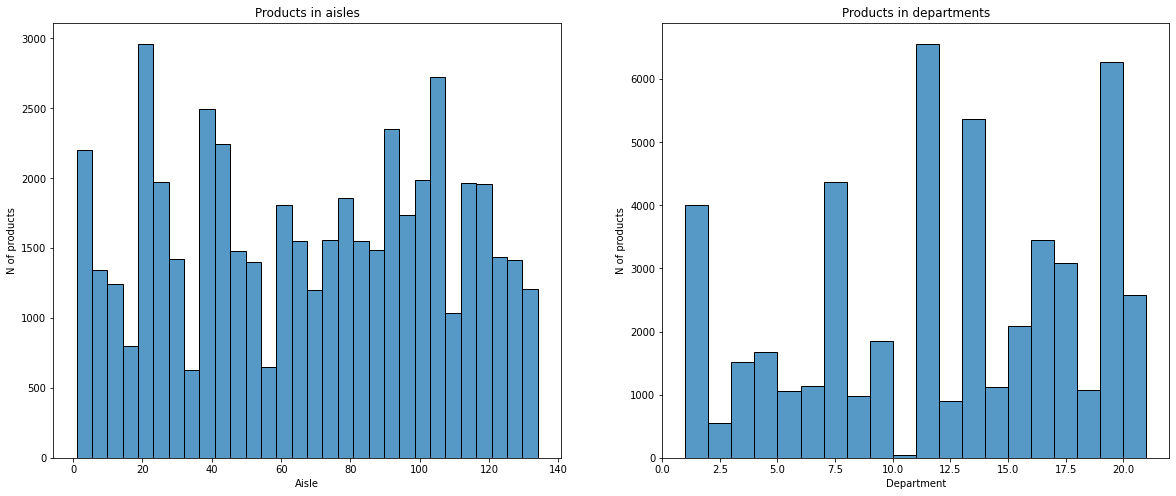

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

# Numero de productos por aisle

sns.histplot(products.aisle_id, bins = 30, ax = ax[0])
ax[0].set_xlabel('Aisle')
ax[0].set_ylabel('N of products')
ax[0].set_title('Products in aisles')


# Tasa de productos reordenados por orden

sns.histplot(products.department_id, bins = 20, ax = ax[1])
ax[1].set_xlabel('Department')
ax[1].set_ylabel('N of products')
ax[1].set_title('Products in departments')